## ETL PART 3 - DATA EXPLORATION¶


In [1]:
#Fire up Python
from mpl_toolkits.mplot3d import Axes3D
import sympy as sym
import pylab 
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import json
import os
%matplotlib inline

In [2]:
#Hole 16 coordinates:
holex = 10625.821
holey = 8838.066

print("Hole 16 coordinates: (" + str(holex) + ", " + str(holey) + ")")

Hole 16 coordinates: (10625.821, 8838.066)


In [3]:
#Load dataset
df2 = pd.read_csv("Waste_Mgt_Phoenix_Only_2015_2016_2017.csv",low_memory=False)


In [4]:
#Putts that went into the hole
df9 = (df2[(df2['tournament'] == 3) & (df2['holes'] == 16) & (df2['putt'] > 0) & (df2['dist'] > 0) & (df2['left'] == 0)])
df10 = df9.set_index(['tournament_name','year','p_full_name','rnds','holes','shots'])

# Let's make the 16th hole's x and y coordinates (0,0) 
df11 = df10.iloc[0:,17:23]
df11.iloc[0:,2:3] =(df11.iloc[0:,2] - holex)
df11.iloc[0:,4:5] = (df11.iloc[0:,4] - holey)

print(str(df10.putt.count()) +" putts made it into hole 16.")

1211 putts made it into hole 16.


In [5]:
#Display putt count per cluster
df12 = (df2[(df2['tournament'] == 3) & (df2['holes'] == 16) & (df2['putt'] > 0) & (df2['dist'] > 0) & (df2['left'] == 0)])
df13 = df12.set_index(['tournament_name','year','p_full_name','rnds','holes','shots'])

df14 = df13.iloc[0:,17:23]
df14.iloc[0:,2:3] = (df14.iloc[0:,2] - holex)
df14.iloc[0:,4:5] = (df14.iloc[0:,4] - holey)

df_far_holed_out_putts = df14[(df14['from_x'] <= 0)]
df_near_holed_out_putts = df14[(df14['from_x'] > 0)]
g_far_holed_out_putts_count = df_far_holed_out_putts.shape[0]
g_near_holed_out_putts_count = df_near_holed_out_putts.shape[0]
g_holed_out_putts_count_total = g_far_holed_out_putts_count + g_near_holed_out_putts_count

print(" far holed out putts: " + str(g_far_holed_out_putts_count) + ", "  + " near holed out putts: " + str(g_near_holed_out_putts_count) 
      + ", "  + "total putts into hole 16: " + str(g_holed_out_putts_count_total))

 far holed out putts: 595,  near holed out putts: 616, total putts into hole 16: 1211


In [6]:
#Display putt count per cluster
df_far_holed_out_putts_1 = df14[((df14['from_x'].real > -1630) & (df14['from_x'].real <= -1600)) & ((df14['from_y'].real > 1660) & (df14['from_y'].real <= 1680))]
df_far_holed_out_putts_2 = df14[((df14['from_x'].real > -1592) & (df14['from_x'].real <= -1577)) & ((df14['from_y'].real > 1600) & (df14['from_y'].real <= 1662))]
df_far_holed_out_putts_3 = df14[((df14['from_x'].real > -1565) & (df14['from_x'].real <= -1550)) & ((df14['from_y'].real > 1675) & (df14['from_y'].real <= 1685))]
df_far_holed_out_putts_4 = df14[((df14['from_x'].real > -1572) & (df14['from_x'].real <= -1540)) & ((df14['from_y'].real > 1700) & (df14['from_y'].real <= 1725))]

g_far_holed_out_putts_1_count = df_far_holed_out_putts_1.shape[0]
g_far_holed_out_putts_2_count = df_far_holed_out_putts_2.shape[0]
g_far_holed_out_putts_3_count = df_far_holed_out_putts_3.shape[0]
g_far_holed_out_putts_4_count = df_far_holed_out_putts_4.shape[0]

g_far_holed_out_putts_sub_cluster_total_count = g_far_holed_out_putts_1_count + g_far_holed_out_putts_2_count + g_far_holed_out_putts_3_count + g_far_holed_out_putts_4_count

print(str(g_far_holed_out_putts_1_count) + " far holed out putts in subcluster 1, "  
          + str(g_far_holed_out_putts_2_count) + " far holed out putts in subcluster 2, "  
          + str(g_far_holed_out_putts_3_count) + " far holed out putts in subcluster 3, "
          + str(g_far_holed_out_putts_4_count) + " far holed out putts in subcluster 4, "
          + "for a total of " + str(g_far_holed_out_putts_sub_cluster_total_count) + ".")

99 far holed out putts in subcluster 1, 179 far holed out putts in subcluster 2, 132 far holed out putts in subcluster 3, 121 far holed out putts in subcluster 4, for a total of 531.


In [7]:
df_near_holed_out_putts_1 = df14[((df14['from_x'].real > 190) & (df14['from_x'].real <= 210)) & ((df14['from_y'].real > 22) & (df14['from_y'].real <= 30))]
df_near_holed_out_putts_2 = df14[((df14['from_x'].real > 207) & (df14['from_x'].real <= 222)) & ((df14['from_y'].real > -15) & (df14['from_y'].real <= 0))]
df_near_holed_out_putts_3 = df14[((df14['from_x'].real > 240) & (df14['from_x'].real <= 250)) & ((df14['from_y'].real > 37) & (df14['from_y'].real <= 50))]
df_near_holed_out_putts_4 = df14[((df14['from_x'].real > 257) & (df14['from_x'].real <= 270)) & ((df14['from_y'].real > 28) & (df14['from_y'].real <= 40))]

g_near_holed_out_putts_1_count = df_near_holed_out_putts_1.shape[0]
g_near_holed_out_putts_2_count = df_near_holed_out_putts_2.shape[0]
g_near_holed_out_putts_3_count = df_near_holed_out_putts_3.shape[0]
g_near_holed_out_putts_4_count = df_near_holed_out_putts_4.shape[0]

g_near_holed_out_putts_sub_cluster_total_count = g_near_holed_out_putts_1_count + g_near_holed_out_putts_2_count + g_near_holed_out_putts_3_count + g_near_holed_out_putts_4_count

print(str(g_near_holed_out_putts_1_count) + " near holed out putts in subcluster 1, "  
          + str(g_near_holed_out_putts_2_count) + " near holed out putts in subcluster 2, "  
          + str(g_near_holed_out_putts_3_count) + " near holed out putts in subcluster 3, "
          + str(g_near_holed_out_putts_4_count) + " near holed out putts in subcluster 4, "
          + "for a total of " + str(g_near_holed_out_putts_sub_cluster_total_count) + ".")

90 near holed out putts in subcluster 1, 173 near holed out putts in subcluster 2, 111 near holed out putts in subcluster 3, 148 near holed out putts in subcluster 4, for a total of 522.


In [8]:
df19 = (df2[(df2['tournament'] == 3) & (df2['holes'] == 16) & (df2['putt'] > 0) & (df2['dist'] > 0) & (df2['left'] > 0)])
df20 = df19.set_index(['tournament_name','year','p_full_name','rnds','holes','shots'])

df21 = df20.iloc[0:,17:23]
df21.iloc[0:,2:3] =(df21.iloc[0:,2] - holex)
df21.iloc[0:,4:5] = (df21.iloc[0:,4] - holey)

#230 rows × 6 columns
df21.shape[0]

797

In [9]:
df22 = (df2[(df2['tournament'] == 3) & (df2['holes'] == 16) & (df2['putt'] > 0) & (df2['dist'] > 0) & (df2['left'] > 0)])
df23 = df22.set_index(['tournament_name','year','p_full_name','rnds','holes','shots'])

df24 = df23.iloc[0:,17:23]
df24.iloc[0:,2:3] = (df24.iloc[0:,2] - holex)
df24.iloc[0:,4:5] = (df24.iloc[0:,4] - holey)

df_far_missed_putts = df24[(df24['from_x'] <= 0)]
df_near_missed_putts = df24[(df24['from_x'] > 0)]
g_far_missed_putts_count = df_far_missed_putts.shape[0]
g_near_missed_putts_count = df_near_missed_putts.shape[0]
g_missed_putts_total_count = g_far_missed_putts_count + g_near_missed_putts_count

print(" far missed putts: " + str(g_far_missed_putts_count) + ", "  + " near missed putts: " + str(g_near_missed_putts_count) 
      + ", "  + "total missed putts on hole 16: " + str(g_missed_putts_total_count))

 far missed putts: 402,  near missed putts: 395, total missed putts on hole 16: 797


# STATS AREA

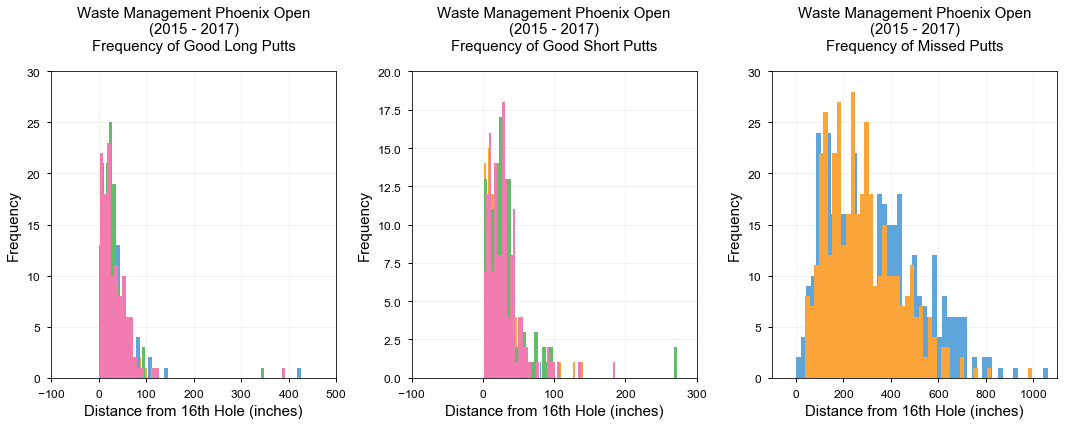

In [16]:
fig = plt.figure(figsize=(100, 100))
ax1 = plt.subplot2grid((20,20), (0,0)) 
ax2 = plt.subplot2grid((20,20), (0,1))
ax3 = plt.subplot2grid((20,20), (0,2))

h_bins = 50

ax1.hist(df_far_holed_out_putts_1.iloc[0:,0],bins=h_bins)
ax1.hist(df_far_holed_out_putts_2.iloc[0:,0],bins=h_bins)
ax1.hist(df_far_holed_out_putts_3.iloc[0:,0],bins=h_bins)
ax1.hist(df_far_holed_out_putts_4.iloc[0:,0],bins=h_bins)

ax2.hist(df_near_holed_out_putts_1.iloc[0:,0],bins=h_bins)
ax2.hist(df_near_holed_out_putts_2.iloc[0:,0],bins=h_bins)
ax2.hist(df_near_holed_out_putts_3.iloc[0:,0],bins=h_bins)
ax2.hist(df_near_holed_out_putts_4.iloc[0:,0],bins=h_bins)

ax3.hist(df_far_missed_putts.iloc[0:,0],bins=h_bins)
ax3.hist(df_near_missed_putts.iloc[0:,0],bins=h_bins)

ax1.set_xlim([-100,500])
ax1.set_ylim([0,30])
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=12)
ax1.set_title("Waste Management Phoenix Open" + "\n" + "(2015 - 2017)" + "\n" + "Frequency of Good Long Putts", y=1.05,size=15)
ax1.set_xlabel(r"Distance from 16th Hole (inches)" , labelpad=5, size=15)
ax1.set_ylabel(r"Frequency", labelpad=5, size=15)

ax2.set_xlim([-100,300])
ax2.set_ylim([0,20])
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_tick_params(labelsize=12)
ax2.yaxis.set_tick_params(labelsize=12)
ax2.set_title("Waste Management Phoenix Open" + "\n" + "(2015 - 2017)" + "\n" + "Frequency of Good Short Putts", y=1.05,size=15)
ax2.set_xlabel(r"Distance from 16th Hole (inches)" , labelpad=5, size=15)
ax2.set_ylabel(r"Frequency", labelpad=5, size=15)

ax3.set_xlim([-100,1100])
ax3.set_ylim([0,30])
ax3.xaxis.set_ticks_position('bottom')
ax3.yaxis.set_ticks_position('left')
ax3.xaxis.set_tick_params(labelsize=12)
ax3.yaxis.set_tick_params(labelsize=12)
ax3.set_title("Waste Management Phoenix Open" + "\n" + "(2015 - 2017)" + "\n" + "Frequency of Missed Putts", y=1.05,size=15)
ax3.set_xlabel(r"Distance from 16th Hole (inches)" , labelpad=5, size=15)
ax3.set_ylabel(r"Frequency", labelpad=5, size=15)

plt.tight_layout()
#plt.savefig('all_putts_histogram.svg')
plt.show()

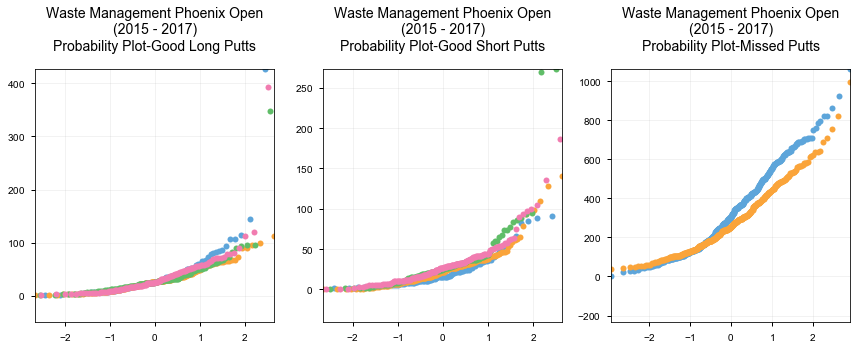

In [17]:
fig = plt.figure(figsize=(60, 60))
ax1 = plt.subplot2grid((15,15), (0,0)) 
ax2 = plt.subplot2grid((15,15), (0,1))
ax3 = plt.subplot2grid((15,15), (0,2)) 



stats.probplot(df_far_holed_out_putts_1.iloc[0:,0], dist="norm", plot=ax1, fit=False)
stats.probplot(df_far_holed_out_putts_2.iloc[0:,0], dist="norm", plot=ax1, fit=False)
stats.probplot(df_far_holed_out_putts_3.iloc[0:,0], dist="norm", plot=ax1, fit=False)
stats.probplot(df_far_holed_out_putts_4.iloc[0:,0], dist="norm", plot=ax1, fit=False)

ax1.get_lines()[1].remove()
ax1.get_lines()[2].remove()
ax1.get_lines()[3].remove()
ax1.get_lines()[4].remove()


ax1.get_lines()[0].set_markerfacecolor('C0')
ax1.get_lines()[1].set_markerfacecolor('C1')
ax1.get_lines()[2].set_markerfacecolor('C2')
ax1.get_lines()[3].set_markerfacecolor('C3')

stats.probplot(df_near_holed_out_putts_1.iloc[0:,0], dist="norm", plot=ax2, fit=False)
stats.probplot(df_near_holed_out_putts_2.iloc[0:,0], dist="norm", plot=ax2, fit=False)
stats.probplot(df_near_holed_out_putts_3.iloc[0:,0], dist="norm", plot=ax2, fit=False)
stats.probplot(df_near_holed_out_putts_4.iloc[0:,0], dist="norm", plot=ax2, fit=False)

ax2.get_lines()[1].remove()
ax2.get_lines()[2].remove()
ax2.get_lines()[3].remove()
ax2.get_lines()[4].remove()


ax2.get_lines()[0].set_markerfacecolor('C0')
ax2.get_lines()[1].set_markerfacecolor('C1')
ax2.get_lines()[2].set_markerfacecolor('C2')
ax2.get_lines()[3].set_markerfacecolor('C3')

stats.probplot(df_far_missed_putts.iloc[0:,0], dist="norm", plot=ax3, fit=False)
stats.probplot(df_near_missed_putts.iloc[0:,0], dist="norm", plot=ax3, fit=False)

ax3.get_lines()[1].remove()
ax3.get_lines()[2].remove()



ax3.get_lines()[0].set_markerfacecolor('C0')
ax3.get_lines()[1].set_markerfacecolor('C1')

ax1.set_title("Waste Management Phoenix Open" + "\n" + "(2015 - 2017)" + "\n" + "Probability Plot-Good Long Putts", y=1.05,size=14)
ax1.set_ylabel(r"", labelpad=5, size=14)
ax1.set_xlabel(r"" , labelpad=5, size=14)
ax2.set_title("Waste Management Phoenix Open" + "\n" + "(2015 - 2017)" + "\n" + "Probability Plot-Good Short Putts", y=1.05,size=14)
ax2.set_ylabel(r"", labelpad=5, size=14)
ax2.set_xlabel(r"" , labelpad=5, size=14)
ax3.set_title("Waste Management Phoenix Open" + "\n" + "(2015 - 2017)" + "\n" + "Probability Plot-Missed Putts", y=1.05,size=14)
ax3.set_ylabel(r"", labelpad=5, size=14)
ax3.set_xlabel(r"" , labelpad=5, size=14)



plt.tight_layout()
#plt.savefig('all_putts_qqplot.svg')
plt.show()


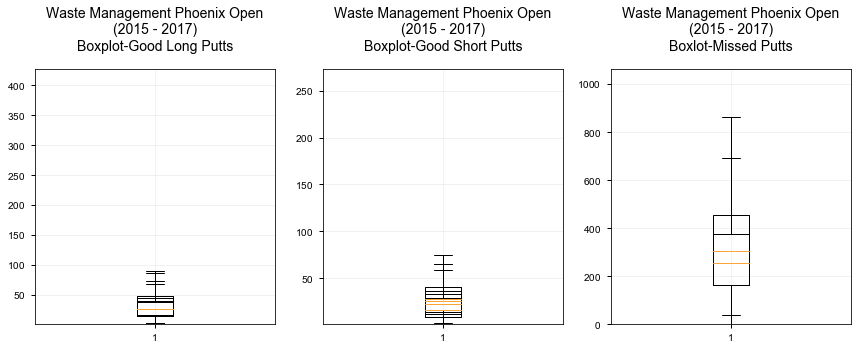

In [18]:
fig = plt.figure(figsize=(60, 60))
ax1 = plt.subplot2grid((15,15), (0,0)) 
ax2 = plt.subplot2grid((15,15), (0,1))
ax3 = plt.subplot2grid((15,15), (0,2))

ax1.boxplot(df_far_holed_out_putts_1.iloc[0:,0])
ax1.boxplot(df_far_holed_out_putts_2.iloc[0:,0])
ax1.boxplot(df_far_holed_out_putts_3.iloc[0:,0])
ax1.boxplot(df_far_holed_out_putts_4.iloc[0:,0])

ax2.boxplot(df_near_holed_out_putts_1.iloc[0:,0])
ax2.boxplot(df_near_holed_out_putts_2.iloc[0:,0])
ax2.boxplot(df_near_holed_out_putts_3.iloc[0:,0])
ax2.boxplot(df_near_holed_out_putts_4.iloc[0:,0])

ax3.boxplot(df_far_missed_putts.iloc[0:,0])
ax3.boxplot(df_near_missed_putts.iloc[0:,0])

ax1.set_title("Waste Management Phoenix Open" + "\n" + "(2015 - 2017)" + "\n" + "Boxplot-Good Long Putts", y=1.05,size=14)
ax2.set_title("Waste Management Phoenix Open" + "\n" + "(2015 - 2017)" + "\n" + "Boxplot-Good Short Putts", y=1.05,size=14)
ax3.set_title("Waste Management Phoenix Open" + "\n" + "(2015 - 2017)" + "\n" + "Boxlot-Missed Putts", y=1.05,size=14)

plt.tight_layout()
#plt.savefig('all_putts_boxplot.svg')
plt.show()